#Загрузим данные предварительно отфильтрованные по принципу: топ 10 регионов, топ 10 вакансий, топ 15 навыков

In [ ]:
!gdown 1OFxymSlp6GOW3WST-dRoywkfHse4RImp
import pandas as pd
topfiltr = pd.read_excel('/content/drive/MyDrive/topfiltr.xlsx')

Downloading...
From: https://drive.google.com/uc?id=1OFxymSlp6GOW3WST-dRoywkfHse4RImp
To: /content/topfiltr.xlsx
100% 95.8k/95.8k [00:00<00:00, 85.7MB/s]


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

1. Структурируем данные

In [ ]:
topfiltr1 = topfiltr[['name', 'salary_converted', 'region', 'key_skills', 'experience']]
topfiltr1

,name,salary_converted,region,key_skills,experience
0,Специалист по информационной безопасности,65000.0,Нижегородская область,Linux,От 1 года до 3 лет
1,Специалист по информационной безопасности,65000.0,Нижегородская область,SQL,От 1 года до 3 лет
2,Системный администратор,54879.5,Нижегородская область,SQL,Нет опыта
3,Графический дизайнер,32500.0,Нижегородская область,Adobe Photoshop/Illustrator,От 1 года до 3 лет
4,Графический дизайнер,40000.0,Нижегородская область,Adobe Photoshop/Illustrator,От 1 года до 3 лет
...,...,...,...,...,...
3368,Программист 1С,120000.0,Челябинская область,1С,От 3 до 6 лет
3369,Инженер-программист,43000.0,Челябинская область,SQL,Нет опыта
3370,Инженер-программист,43000.0,Челябинская область,Linux,Нет опыта
3371,Инженер-программист,43000.0,Челябинская область,Active Directory,Нет опыта


2. Проанализируем типы данных

In [ ]:
topfiltr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3373 non-null   object 
 1   salary_converted  3373 non-null   float64
 2   region            3373 non-null   object 
 3   key_skills        3373 non-null   object 
 4   experience        3373 non-null   object 
dtypes: float64(1), object(4)
memory usage: 131.9+ KB


Типы данных:

name (наименование вакансии) - категориальный тип,
salary_converted (среднее значение з/п в рублях) - количественный тип,
region (регион вакансии) - категориальный тип,
key_skills (навыки) - категориальный тип,
experience (требуемый опыт работы) - категориальный тип.

3. Визуализация данных

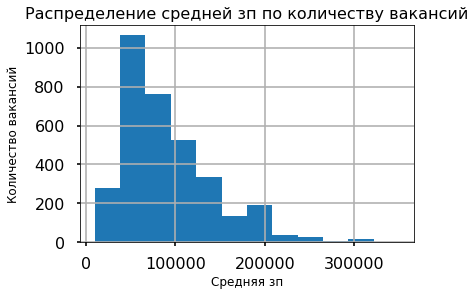

In [ ]:
topfiltr['salary_converted'].hist(bins=12)
plt.title("Распределение средней зп по количеству вакансий", fontsize = 16)
plt.ylabel('Количество вакансий', fontsize = 12)
plt.xlabel('Средняя зп', fontsize = 12)
plt.show()

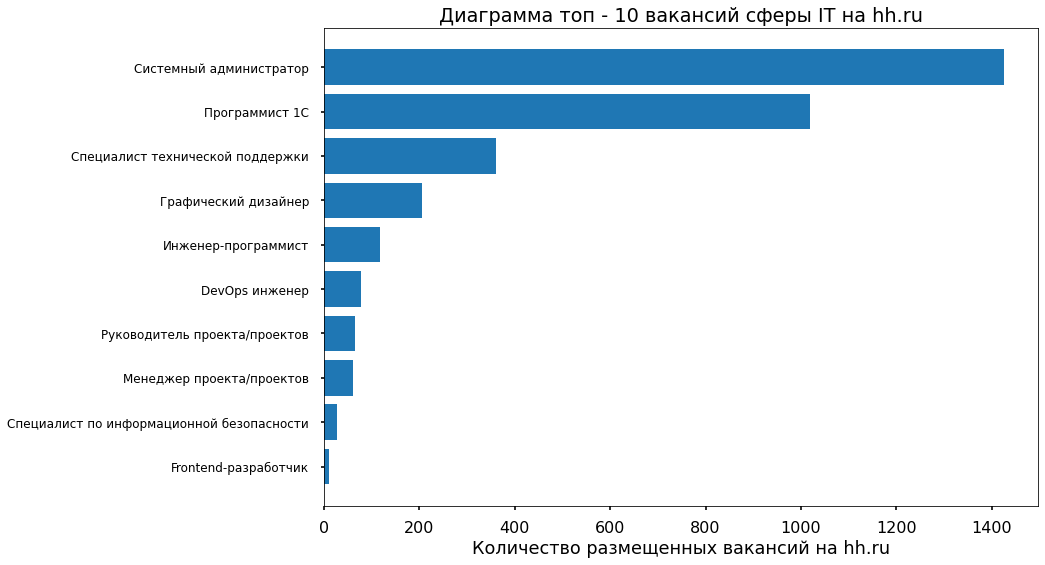

In [ ]:
top_10_name = topfiltr['name'].value_counts()
top_10_name = top_10_name.iloc[::-1]

plt.style.use('seaborn-poster')
plt.barh(top_10_name.index, top_10_name.values)
plt.yticks(fontsize = 12)
plt.xlabel('Количество размещенных вакансий на hh.ru')
plt.title('Диаграмма топ - 10 вакансий сферы IT на hh.ru')
plt.show()

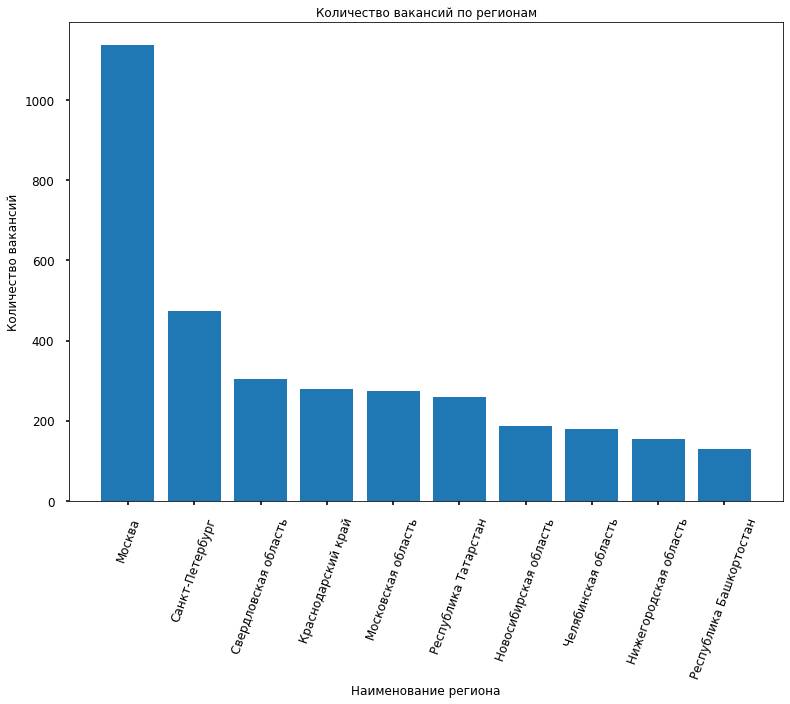

In [ ]:
region_vac_count = topfiltr['region'].value_counts()
plt.bar(region_vac_count.index, region_vac_count)

plt.title(label = "Количество вакансий по регионам", fontsize = 12)
plt.ylabel("Количество вакансий",  fontsize = 12)
plt.xlabel("Наименование региона", fontsize = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 70)

plt.show()

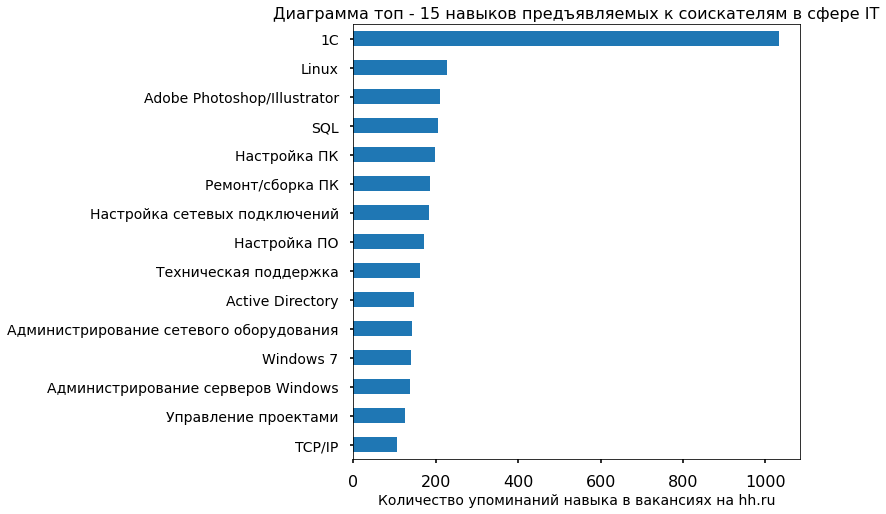

In [ ]:
top_15_skills_it = topfiltr['key_skills'].value_counts()
top_15_skills_it = top_15_skills_it.iloc[::-1]
top_15_skills_it.plot.barh(stacked=True, figsize=(8, 8));
plt.title('Диаграмма топ - 15 навыков предъявляемых к соискателям в сфере IT', fontsize = 16)
plt.yticks(fontsize = 14)
plt.xlabel('Количество упоминаний навыка в вакансиях на hh.ru', fontsize = 14)
plt.show()

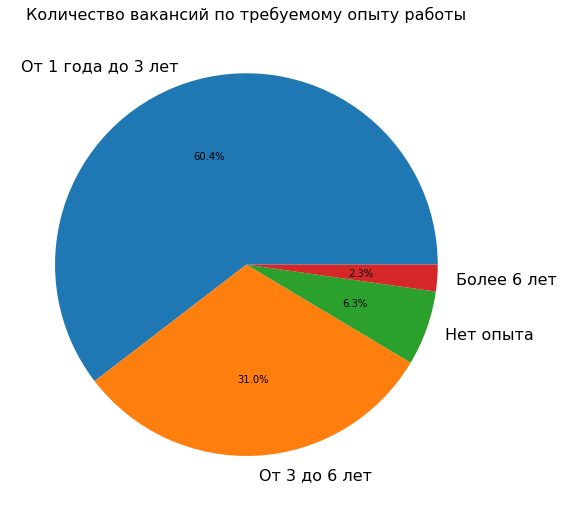

In [ ]:
experience_count = topfiltr['experience'].value_counts()

plt.pie(experience_count, labels = experience_count.index, autopct='%1.1f%%')
plt.title(label = "Количество вакансий по требуемому опыту работы", fontsize = 16)
plt.show()

4. Гипотеза о виде распределения

Для количественных показателей проверим гипотезу о нормальном распределении.
Гипотеза Н0: распредение средней заработной платы соответствует нормальному

In [ ]:
#Вычисляем статистические показатели
topfiltr['salary_converted'].describe()

count      3373.000000
mean      90975.706196
std       51722.115381
min       10000.000000
25%       50000.000000
50%       80000.000000
75%      120000.000000
max      350000.000000
Name: salary_converted, dtype: float64

Среднеквадратичное отклонение показывает разброс примерно 51722,11 от среднего.

In [ ]:
#Вычисляем моду
topfiltr['salary_converted'].mode()

0    50000.0
dtype: float64

Наиболее часто встречающаяся зарплата 50000 руб.

In [ ]:
# Вычисляем медиану
topfiltr['salary_converted'].median()

80000.0

Половина средних зарплат больше или равна 80000 р

In [ ]:
#Вычисляем коэффициент вариации
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100
cv(topfiltr['salary_converted'])

56.8526670954405

Коэффициент вариации говорит о том что совокупность данных неоднородна

Критерий Шапиро-Уилка. 
Гипотеза Н0: выборка принадлежит нормальной гениральной совокупности, при уровне значимости 0,05.

In [ ]:
stats.shapiro(topfiltr['salary_converted'])

ShapiroResult(statistic=0.9000194668769836, pvalue=2.0318827732709848e-42)

p-value почти = 0, при уровне значимости 0,05. Отклоняем нулевую гипотезу в пользу алтернативной и мы не можем сказать что исследуемая выборка принадлежит к нормальной генеральной совокупности.

Тест д'Агостино. 
Гипотеза Н0: выборка принадлежит нормальной генеральной совокупности, при уровне значимости 0,05.

In [ ]:
stats.normaltest(topfiltr['salary_converted'])

NormaltestResult(statistic=630.6820336332219, pvalue=1.1197897265995462e-137)

Распределение количественных показателей не является нормальным, т.к. показатель pvalue равен нулю, что меньше выбранного уровня значимости 0.05 (отклоняем гипотезу H0)

5. Оценим связь между показателями

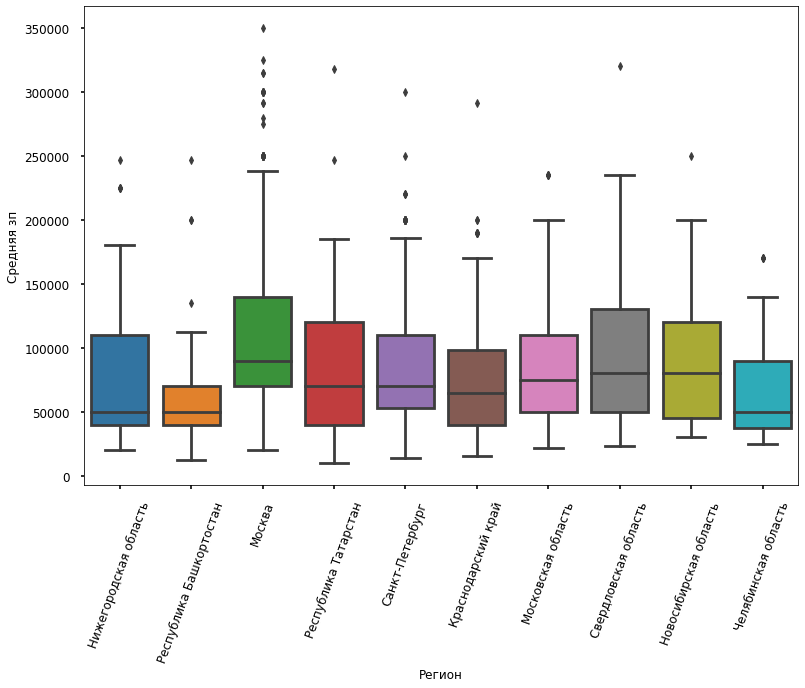

In [ ]:
f, ax = plt.subplots()
fig = sns.boxplot(x='region', y='salary_converted', data=topfiltr)
plt.xlabel('Регион', fontsize = 12)
plt.ylabel('Средняя зп', fontsize = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 70)
plt.show()

Применим криетрий Краскала-Уолиса

In [ ]:
ndf1=np.array(topfiltr[topfiltr['region']=='Нижегородская область']['salary_converted'])
ndf2=np.array(topfiltr[topfiltr['region']=='Москва']['salary_converted'])
ndf3=np.array(topfiltr[topfiltr['region']=='Республика Башкортостан']['salary_converted'])
ndf4=np.array(topfiltr[topfiltr['region']=='Республика Татарстан']['salary_converted'])
ndf5=np.array(topfiltr[topfiltr['region']=='Санкт-Петербург']['salary_converted'])
ndf6=np.array(topfiltr[topfiltr['region']=='Краснодарский край']['salary_converted'])
ndf7=np.array(topfiltr[topfiltr['region']=='Московская область']['salary_converted'])
ndf8=np.array(topfiltr[topfiltr['region']=='Свердловская область']['salary_converted'])
ndf9=np.array(topfiltr[topfiltr['region']=='Новосибирская область']['salary_converted'])
ndf10=np.array(topfiltr[topfiltr['region']=='Челябинская область']['salary_converted'])
stats.mstats.kruskalwallis(ndf1,ndf2,ndf3,ndf4,ndf5,ndf6,ndf7,ndf8,ndf9,ndf10)

KruskalResult(statistic=374.5200824931606, pvalue=3.715870484931271e-75)

Из расчета мы видим что p-value почти = 0 (при уровне значимости 0,05), поэтому гипотезу Н0 отклоняем. Следовательно, средняя заработная плата зависит от региона.

Гипотеза 2

Гипотеза Н0: статистически значимые отличия между навыками и заработной платой отсутствуют

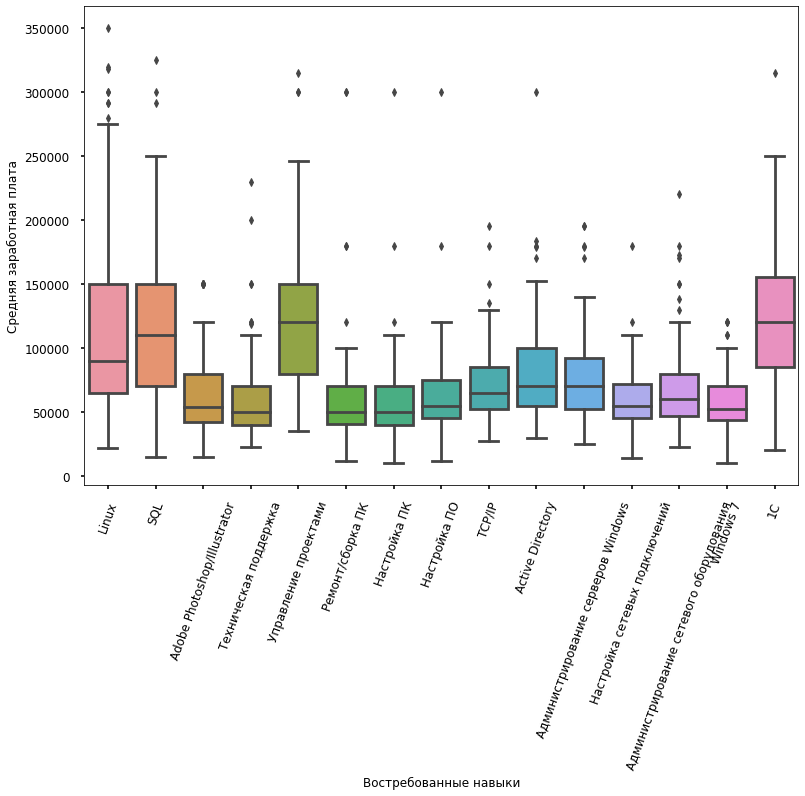

In [ ]:
f, ax = plt.subplots()
fig = sns.boxplot(x='key_skills', y='salary_converted', data=topfiltr)
plt.xlabel('Востребованные навыки', fontsize = 12)
plt.ylabel('Средняя заработная плата', fontsize = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 70)
plt.show()

In [ ]:
ndf1=np.array(topfiltr[topfiltr['key_skills']=='Linux']['salary_converted'])
ndf2=np.array(topfiltr[topfiltr['key_skills']=='SQL']['salary_converted'])
ndf3=np.array(topfiltr[topfiltr['key_skills']=='Adobe Photoshop/Illustrator']['salary_converted'])
ndf4=np.array(topfiltr[topfiltr['key_skills']=='Управление проектами']['salary_converted'])
ndf5=np.array(topfiltr[topfiltr['key_skills']=='Техническая поддержка']['salary_converted'])
ndf6=np.array(topfiltr[topfiltr['key_skills']=='TCP/IP']['salary_converted'])
ndf7=np.array(topfiltr[topfiltr['key_skills']=='Active Directory']['salary_converted'])
ndf8=np.array(topfiltr[topfiltr['key_skills']=='Администрирование серверов Windows']['salary_converted'])
ndf9=np.array(topfiltr[topfiltr['key_skills']=='Настройка ПК']['salary_converted'])
ndf10=np.array(topfiltr[topfiltr['key_skills']=='Настройка ПО']['salary_converted'])
ndf11=np.array(topfiltr[topfiltr['key_skills']=='Ремонт/сборка ПК']['salary_converted'])
ndf12=np.array(topfiltr[topfiltr['key_skills']=='Настройка сетевых подключений']['salary_converted'])
ndf13=np.array(topfiltr[topfiltr['key_skills']=='Администрирование сетевого оборудования']['salary_converted'])
ndf14=np.array(topfiltr[topfiltr['key_skills']=='Windows 7']['salary_converted'])
ndf15=np.array(topfiltr[topfiltr['key_skills']=='1С']['salary_converted'])
stats.mstats.kruskalwallis(ndf1,ndf2,ndf3,ndf4,ndf5,ndf6,ndf7,ndf8,ndf9,ndf10,ndf11,ndf12,ndf13,ndf14,ndf15)

KruskalResult(statistic=1194.702798120443, pvalue=2.387851288429488e-246)

 p-value почти = 0 (что меньше чем уровень значимости 0.05). Гипотезу Н0 отклоняем. Вывод - средняя заработная плата зависит от навыков.

#Анализ таблиц сопряженности

In [ ]:
wd = pd.crosstab(topfiltr['region'],topfiltr['name'])
wd

name,DevOps инженер,Frontend-разработчик,Графический дизайнер,Инженер-программист,Менеджер проекта/проектов,Программист 1С,Руководитель проекта/проектов,Системный администратор,Специалист по информационной безопасности,Специалист технической поддержки
region,,,,,,,,,,
Краснодарский край,1,1,33,27,3,93,2,83,3,32
Москва,40,5,76,2,33,195,34,593,13,147
Московская область,0,0,14,13,1,68,1,125,0,51
Нижегородская область,1,0,3,11,4,58,0,54,2,20
Новосибирская область,7,0,6,2,5,87,3,64,1,11
Республика Башкортостан,0,2,8,10,1,39,1,58,2,8
Республика Татарстан,7,0,13,12,1,130,9,67,1,19
Санкт-Петербург,13,4,42,8,4,139,13,193,4,54
Свердловская область,9,0,4,8,6,147,2,110,1,18


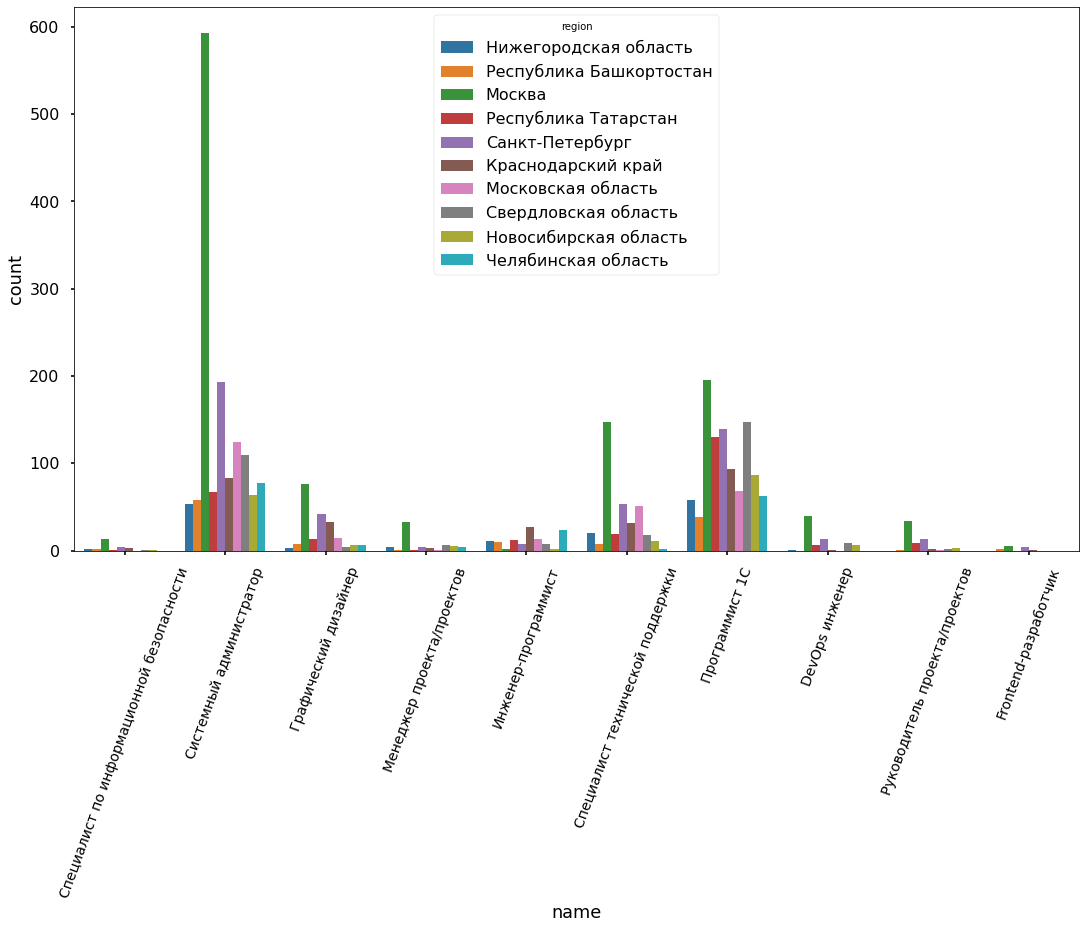

In [ ]:
# Визуализируем данные
f, ax = plt.subplots(figsize=(18, 10))
sns.countplot(x=topfiltr['name'], hue=topfiltr['region'])
plt.xticks(fontsize = 14, rotation = 70)
plt.show()

In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format(chi2, df, prob))

test Statistics: 552.4605116632506
degrees of freedom: 81
p-value: 2.644812381370023e-71



Из вычисления мы видим ,что p-value почти = 0, что менбше уровня значимости 0,05. Мы отклоняем гипотезу Н0: данные факторы (вакансия и регион) взаимосвязаны.

#Гипотеза 4

ипотеза Н0: связь двух категориальных переменных регион и опыт отсутствуют

In [ ]:
# Создаем таблицу сопряженности
rd = pd.crosstab(topfiltr['region'],topfiltr['experience'])
rd

experience,Более 6 лет,Нет опыта,От 1 года до 3 лет,От 3 до 6 лет
region,,,,
Краснодарский край,0,12,205,61
Москва,41,49,623,425
Московская область,5,28,177,63
Нижегородская область,0,24,101,28
Новосибирская область,0,6,110,70
Республика Башкортостан,0,11,99,19
Республика Татарстан,0,15,150,94
Санкт-Петербург,17,30,257,170
Свердловская область,9,22,187,87


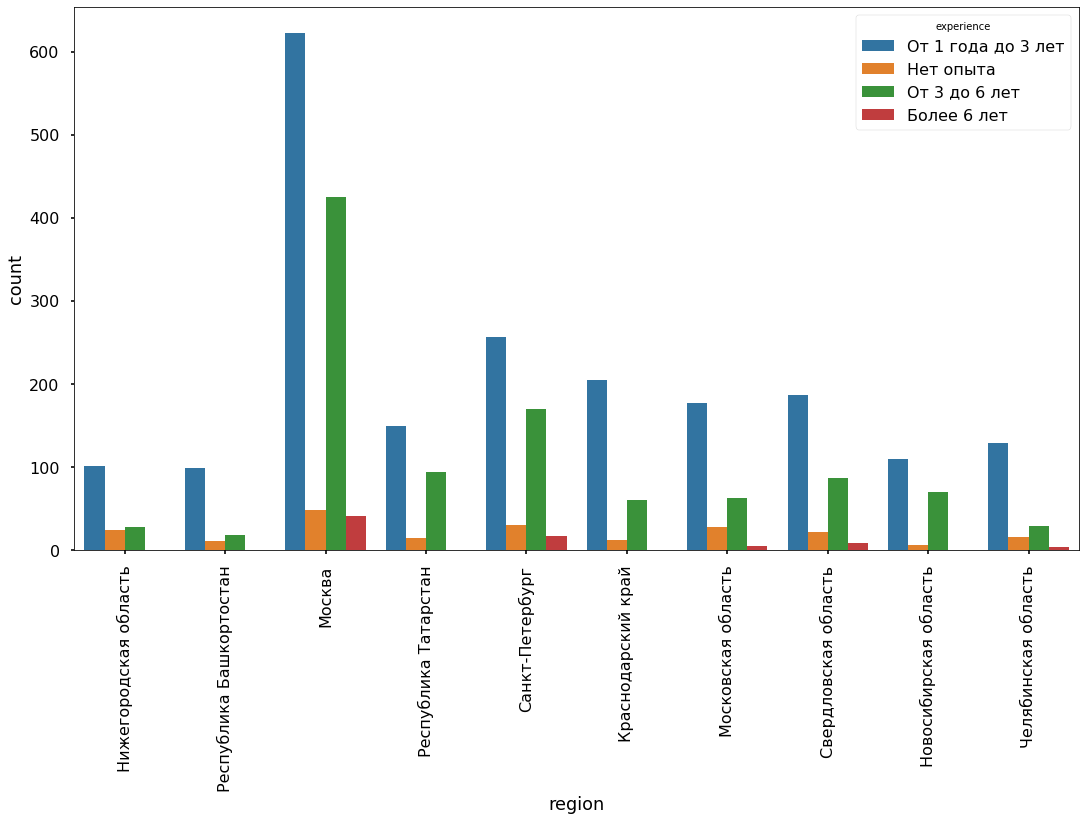

In [ ]:
f, ax = plt.subplots(figsize=(18, 10))
sns.countplot(x=topfiltr['region'], hue=topfiltr['experience'])
plt.xticks(fontsize = 16, rotation = 90)
plt.show()

In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(rd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format(chi2, df, prob))

test Statistics: 177.3070719816253
degrees of freedom: 27
p-value: 4.747048506219828e-24



Из вычисления мы видим, что p-value почти = 0. Для уровня значимости 0,05 мы отклоняем гипотезу Н0: связь двух категориальных переменных опыта работы и регион не значительна. Следовательно данные факторы (опыт и регион) взаимосвязаны.

#Гипотеза 5
 связь двух категориальных переменных опыт работы и навыки не значительна.

In [ ]:
re = pd.crosstab(topfiltr['key_skills'], topfiltr['experience'])
re

experience,Более 6 лет,Нет опыта,От 1 года до 3 лет,От 3 до 6 лет
key_skills,,,,
1С,34,32,543,423
Active Directory,6,6,85,50
Adobe Photoshop/Illustrator,0,13,125,72
Linux,3,13,131,81
SQL,4,14,109,78
TCP/IP,2,7,77,21
Windows 7,2,12,97,28
Администрирование серверов Windows,4,6,78,50
Администрирование сетевого оборудования,4,7,95,36


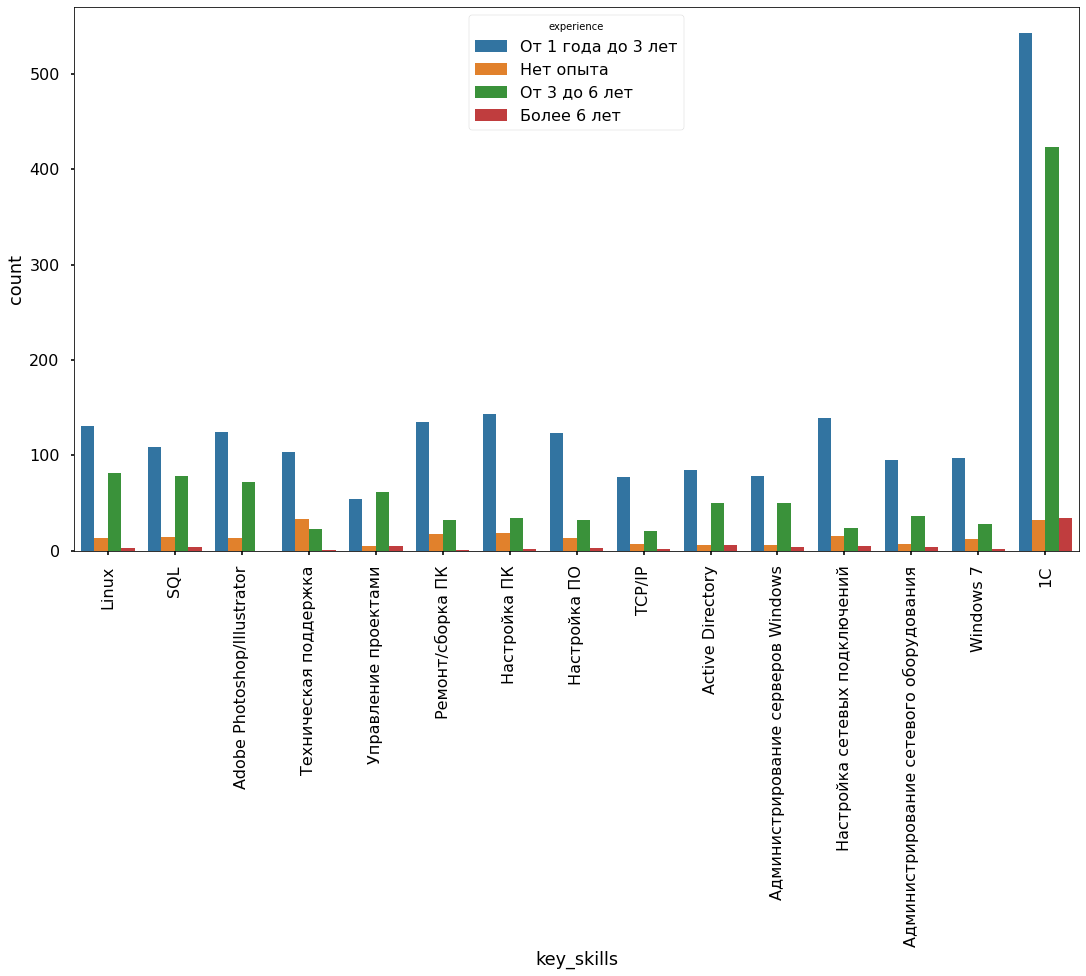

In [ ]:
f, ax = plt.subplots(figsize=(18, 10))
sns.countplot(x=topfiltr['key_skills'], hue=topfiltr['experience'])
plt.xticks(fontsize = 16, rotation = 90)
plt.show()

In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(re)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format(chi2, df, prob))

test Statistics: 278.6635277614321
degrees of freedom: 42
p-value: 1.1234609277071301e-36



Так как p-value почти = 0, то для уровня значимости 0,05 мы отклоняем гипотезу Н0: связь двух категориальных переменных опыта работы и навыков не значительна. Следовательно данные факторы (опыт и навыки) взаимосвязаны.

#Гипотеза 6
Гипотеза Н0: связь двух категориальных переменных навыки и вакансия отсутствуют

In [ ]:
# Создаем таблицу сопряженности
rn = pd.crosstab(topfiltr['key_skills'], topfiltr['name'])
rn

name,DevOps инженер,Frontend-разработчик,Графический дизайнер,Инженер-программист,Менеджер проекта/проектов,Программист 1С,Руководитель проекта/проектов,Системный администратор,Специалист по информационной безопасности,Специалист технической поддержки
key_skills,,,,,,,,,,
1С,0,0,1,40,7,936,5,26,0,17
Active Directory,0,0,0,3,0,0,0,134,0,10
Adobe Photoshop/Illustrator,0,3,201,0,3,0,0,2,0,1
Linux,49,4,0,17,0,3,0,127,14,14
SQL,25,5,0,25,1,67,3,57,3,19
TCP/IP,2,0,0,0,0,0,0,79,5,21
Windows 7,0,0,0,8,0,0,0,97,2,32
Администрирование серверов Windows,0,0,0,2,0,0,0,127,1,8
Администрирование сетевого оборудования,0,0,0,0,0,0,0,130,1,11


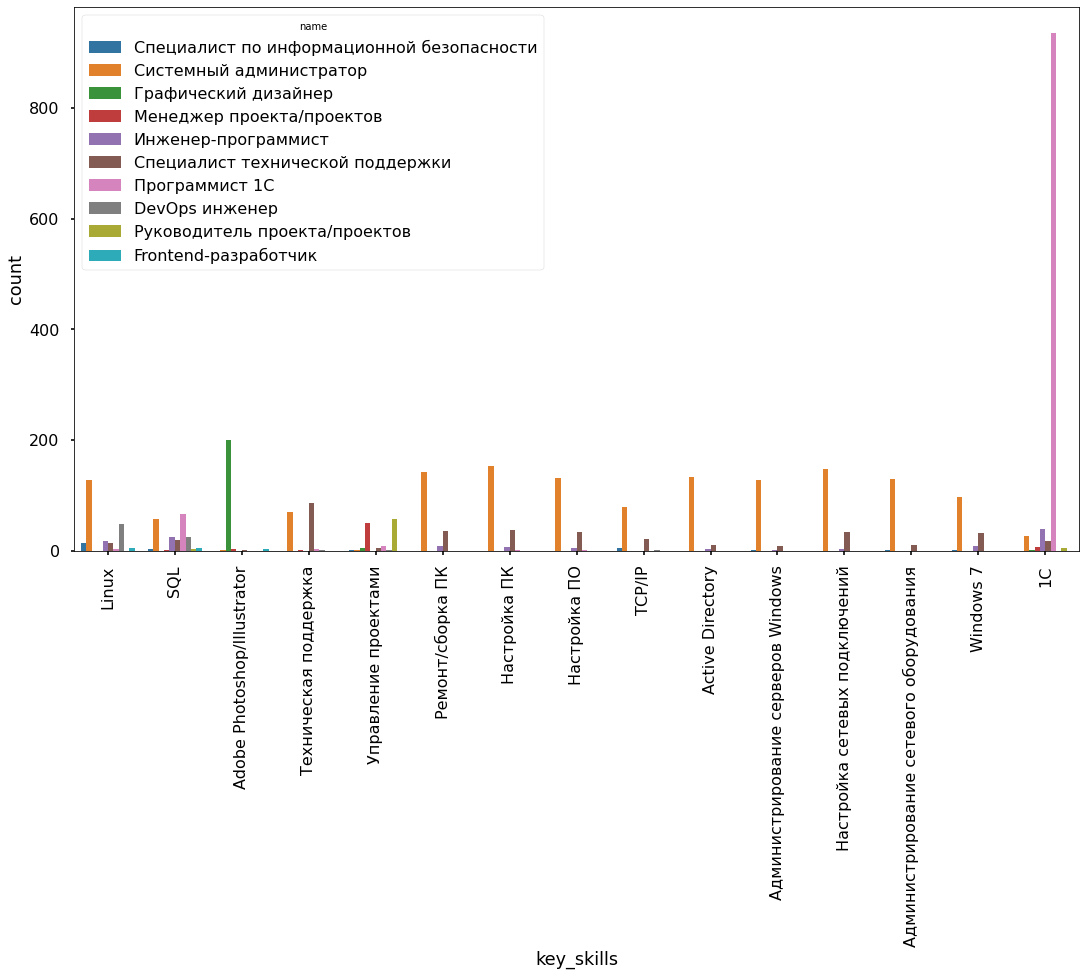

In [ ]:
f, ax = plt.subplots(figsize=(18, 10))
sns.countplot(x=topfiltr['key_skills'], hue=topfiltr['name'])
plt.xticks(fontsize = 16, rotation = 90)
plt.show()

In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(rn)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi2, df, prob))

test Statistics: 9411.741077723022
degrees of freedom: 126
p-value: 0.0



#Корреляционный анализ Спирмена для количественных или порядковых переменных.

In [ ]:
topfiltr['experience'].unique()

array(['От 1 года до 3 лет', 'Нет опыта', 'От 3 до 6 лет', 'Более 6 лет'],
      dtype=object)

In [ ]:
#Кодируем опыт
d = {'Нет опыта': 0, 'От 1 года до 3 лет': 2, 'От 3 до 6 лет': 4, 'Более 6 лет': 6} 
topfiltr['experience_rang'] = topfiltr['experience'].map(d)

In [ ]:
#ранговая корреляция Спирмена
topfiltr[['salary_converted', 'experience_rang']].corr(method = 'spearman') 

,salary_converted,experience_rang
salary_converted,1.00000,0.42928
experience_rang,0.42928,1.00000


In [ ]:
scipy.stats.spearmanr(topfiltr.salary_converted, topfiltr.experience_rang, nan_policy='omit')

SpearmanrResult(correlation=0.4292799085223365, pvalue=2.5477046110980153e-151)

Так как pvalue меньше 0,05 (уровень значимости) делаем вывод, что наша корреляция статистически значимая (отклоняем гипотезу H0). Данные факторы (опыт и средняя заработная плата) взаимосвязаны.

#Вывод: для анализа мы брали датасет с колонками: наименование вакансии, среднее значение з/п, регион в котором размещена вакансия, навыки, требуемый опыт работы отфильтрованные по следующим принципам:  топ - 10 вакансий, топ - 10 регионов, топ - 15 навыков. Наиболее частая вакансия - системный администратор, наиболее часто встречающееся требование по опыту: от 1 года дол 3 лет, наиболее востребованный навык - 1С. Регион с самым большим количеством вакансий - Москва. Мода средней з/п составляет 50000 руб, а медиана - 80000 руб. Средняя заработная плата зависит от региона, от навыков. Вакансии и регион взаимосвязаны. Опыт и регион взаимосвязаны. Опыт и навыки взаимосвязаны. Факторы вакансии и навыки взаимосвязаны. Опыт и средняя заработная плата взаимосвязаны.